# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [1]:
import numpy as np
import pandas as pd

In [10]:
df_raw = pd.read_csv('peer_effects_room.csv')

This code also adds the gpa at once

In [15]:
df = df_raw.merge(df_raw, on='room', suffixes=('','_other'))
df = df[df['person']!=df['person_other']]

In [18]:
df

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
1,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
2,1645,351,-0.818594,-0.434847,0,-1.715472,-1.285307
5,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
6,1039,738,-0.493444,0.299729,1,-0.530190,-0.031833
9,2,247,-0.589543,-0.203230,944,1.281112,-0.479543
...,...,...,...,...,...,...,...
3990,1951,54,2.111587,-0.610765,1860,1.993014,1.870441
3993,1884,178,-1.261528,-2.280256,1916,-1.706630,-3.209575
3994,1916,178,-1.706630,-3.209575,1884,-1.261528,-2.280256
3997,1922,730,1.642223,4.076931,1946,-0.121075,0.114143


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

See answer above 

<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

In [17]:
import matplotlib.pyplot as plt

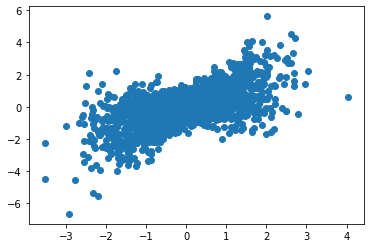

In [20]:
plt.scatter(df['high_school_GPA'],df['college_GPA'])

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

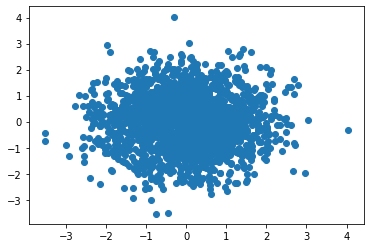

In [21]:
plt.scatter(df['high_school_GPA'],df['high_school_GPA_other'])

There does not seem to be any clear relationship between high school gpas of roommates.

In [22]:
import statsmodels.formula.api as smf

results = smf.ols('high_school_GPA ~ high_school_GPA_other', data=df).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Wed, 20 May 2020   Prob (F-statistic):              0.788
Time:                        19:08:09   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.02

Again we see no significant relationship between high school gpas of roommate pairs. It seems as though radomization has worked.

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

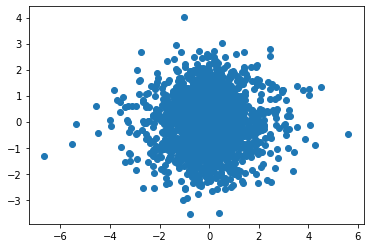

In [24]:
plt.scatter(df['college_GPA'],df['high_school_GPA_other'])

In [26]:
results = smf.ols('college_GPA ~ high_school_GPA + high_school_GPA_other', data=df).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     671.3
Date:                Wed, 20 May 2020   Prob (F-statistic):          1.03e-223
Time:                        19:12:47   Log-Likelihood:                -2586.0
No. Observations:                2000   AIC:                             5178.
Df Residuals:                    1997   BIC:                             5195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.02

We find a significant effect of ones own gpa, and a borderline significant effect of the roommates gpa

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

The requested regression seems to be the same as before?

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

The paper uses the variation in the share of resourceful children within each school over time. The claim that this circurmvent the selection problem of parents selecting into school with more resourceful children.

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

If the variation from year to year is not random, the estimated effects would be biased. 

> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

Randomly assign students to classes within schools. 